In [64]:
import pandas as pd
import xgboost
import shap
import gately
import numpy as np
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [102]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.datasets import load_gunpoint
from sktime.datasets import load_osuleaf

X, y = load_gunpoint()


numpy_X = []
for i in range(0,X.shape[0]):
    numpy_X.append(X.loc[i].values[0])
X = np.asarray(numpy_X)

y = np.asarray(y)

X = (X - np.min(X))/(np.max(X)-np.min(X))
#y =  (y - np.min(y))/(np.max(y)-np.min(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [103]:
X_train.shape

(134, 150)

In [108]:
reg = RocketClassifier(num_kernels=100)
reg.fit(np.asarray(X_train), np.asarray(y_train))
clf = reg
clf.predict(X_test[0].reshape(1,150))

array(['1'], dtype='<U1')

In [110]:
classA = []
classB = []
for i in X_test:
    if clf.predict(i.reshape(1,-1)) == '1':
        classA.append(i)
    elif clf.predict(i.reshape(1,-1)) == '2':
        classB.append(i)

In [111]:


matches = 0
gate_distance = []
ks_distance = []
for ind in range(0,2):
    explainer = shap.KernelExplainer(clf.predict_proba, classA[ind].reshape(1,-1))
    shap_values = explainer.shap_values(classB[ind].reshape(1,-1), nsamples=1000)
    att_gately = gately.Gately_classification(classB[ind],classA[ind],clf.predict_proba)
    
    if att_gately == -1:
        print("skip")
    else:
   
        ks = {}
        for i in range(0,X.shape[1]):
            ks[i] = np.abs(shap_values[0][0][i])

        gat = {}
        for i in range(0,X.shape[1]):
            gat[i] = np.abs(att_gately[i])

        tick = 0


        for i,j in zip(ks.values(),att_gately.values()):
            if round(i,3) != round(j,3):
                tick = 1
        if tick == 0:
            matches += 1

        ks_sorted = sorted(ks, key=ks.get, reverse=True)
        gate_sorted = sorted(gat, key=gat.get, reverse=True)

        x_sample = classB[ind].copy()
        x_sample[ks_sorted[0]] = classA[ind][ks_sorted[0]]
        ks_prediction = clf.predict_proba(x_sample.reshape(1,-1))[0]

        x_sample = classB[ind].copy()
        x_sample[gate_sorted[0]] = classA[ind][gate_sorted[0]]
        gate_prediction = clf.predict_proba(x_sample.reshape(1,-1))[0]

        #print(regr.predict(X_test[ind].reshape(1,-1)))

        gate_distance.append(np.abs(gate_prediction - clf.predict_proba(classA[ind].reshape(1,-1))[0]))
        ks_distance.append(np.abs(ks_prediction - clf.predict_proba(classA[ind].reshape(1,-1))[0]))



  0%|          | 0/1 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

  0%|          | 0/1 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [112]:
print(np.mean(gate_distance))
print(np.std(gate_distance))

1.0
0.0


In [113]:
gate_distance

[array([1., 1.]), array([1., 1.])]

In [114]:
print(np.mean(ks_distance))
print(np.std(ks_distance))

1.0
0.0


In [115]:
ks

{0: 0.08307479740307504,
 1: 0.0,
 2: 0.0,
 3: 0.019688719135480117,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.07015624750364623,
 10: 0.05171667606707908,
 11: 0.09312780819204783,
 12: 0.04599366759710997,
 13: 0.0,
 14: 0.0,
 15: 0.1346127761814398,
 16: 0.0,
 17: 0.13663465244590714,
 18: 0.03883698295216854,
 19: 0.027761566676931134,
 20: 0.0467872983031894,
 21: 0.03991632152420783,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.06253340877314598,
 27: 0.03238024364220878,
 28: 0.0,
 29: 0.06621515464220809,
 30: 0.0,
 31: 0.0,
 32: 0.08556576686444184,
 33: 0.022208856167667195,
 34: 0.08942886171711732,
 35: 0.0,
 36: 0.019238936119066605,
 37: 0.0,
 38: 0.015888887887960404,
 39: 0.0,
 40: 0.051403369530167935,
 41: 0.060559891496508804,
 42: 0.05308852840239208,
 43: 0.02805464208005451,
 44: 0.06600687877988126,
 45: 0.07757028802604905,
 46: 0.06389632043191981,
 47: 0.0,
 48: 0.05905183060317255,
 49: 0.0,
 50: 0.03591900199716369,
 51: 0.038332554868740036,
 52:

In [93]:
gat

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 0.0,
 95: 0.0,
 96: 0.0,
 97: 0.0,
 98: 0.0,
 99: 0.0,
 100: 0.0,

In [94]:
ks

{0: 0.0,
 1: 0.0014052545859924213,
 2: 0.0,
 3: 0.05613019608763249,
 4: 0.0,
 5: 0.0,
 6: 0.05683087985217956,
 7: 0.0,
 8: 0.06158856699539745,
 9: 0.0,
 10: 0.0,
 11: 0.03745672023766,
 12: 0.0744346711894555,
 13: 0.0,
 14: 0.0,
 15: 0.00589723744492466,
 16: 0.0,
 17: 0.11347204180766515,
 18: 0.0,
 19: 0.12033781008366283,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.04114763114532272,
 24: 0.0,
 25: 0.0,
 26: 0.0729885483315382,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.06882450326124051,
 37: 0.06620438745969802,
 38: 0.0020860197216751647,
 39: 0.0,
 40: 0.03548989631520265,
 41: 0.0,
 42: 0.10247500379899925,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.012436431461672358,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.060396299727399794,
 51: 0.02322267861282557,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.02240369743712019,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.06513925078429446,
 63: 0.0,
 64: 0.0,
 65: 0.0375659122087497

In [127]:
x_sample = classB[ind].copy()
x_sample[gate_sorted[0:10]] = classA[ind][gate_sorted[0:10]]
gate_prediction = clf.predict_proba(x_sample.reshape(1,-1))[0]

In [128]:
gate_prediction

array([0., 1.])

In [129]:
clf.predict_proba(classA[ind].reshape(1,-1))

array([[1., 0.]])

In [130]:
clf.predict_proba(classB[ind].reshape(1,-1))

array([[0., 1.]])

In [131]:
X.shape

(200, 150)

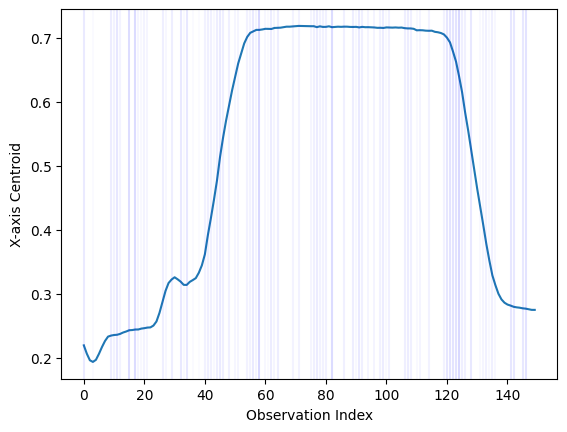

In [132]:


plt.plot(classA[ind])
for i in range(0,150):
    plt.axvline(i,color='blue',alpha=ks[i])
plt.xlabel('Observation Index')
plt.ylabel('X-axis Centroid')
plt.savefig('Gunpoint_ref_ks.pdf')

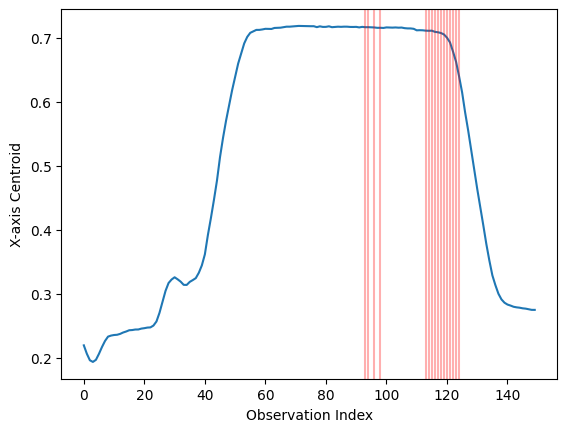

In [133]:
plt.plot(classA[ind])
for i in range(0,150):
    plt.axvline(i,color='red',alpha=gat[i]*5)
plt.xlabel('Observation Index')
plt.ylabel('X-axis Centroid')
plt.savefig('Gunpoint_ref_gat.pdf')

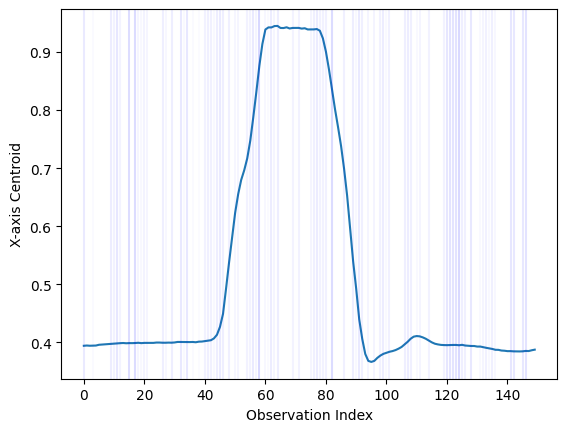

In [135]:
plt.plot(classB[ind])
for i in range(0,150):
    plt.axvline(i,color='blue',alpha=ks[i])
plt.xlabel('Observation Index')
plt.ylabel('X-axis Centroid')
plt.savefig('Gunpoint_sample_ks.pdf')

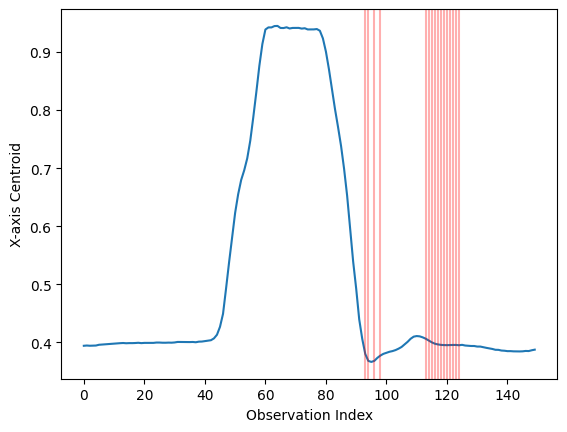

In [136]:
plt.plot(classB[ind])
for i in range(0,150):
    plt.axvline(i,color='red',alpha=gat[i]*5)
plt.xlabel('Observation Index')
plt.ylabel('X-axis Centroid')
plt.savefig('Gunpoint_sample_gat.pdf')